In [30]:
import os
import pandas as pd

database = 'w3a'
#database = 'abalone'
#database = 'a5a'
#database = 'eunite2001'
#database = 'Diabetes'

path = '/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/'
directory = path + f'results/{database}/accuracy_time_stats'  # Replace this with the path to your directory
verbose_path = path + f'results/{database}/verboses'
analysis_files = path + f'analysis/{database}'
plot_path = f'{analysis_files}/plot/'

## columns names 
percent_column = 'percent'
n_components_column = 'n_components' 
score_column = 'Mean Score in test'		
time_column = 'Mean Training Time'
damping_column = 'damping'


# Get a list of all files in the directory
files = [file for file in os.listdir(directory) if os.path.isfile(os.path.join(directory, file))]

# Now 'files' contains a list of the names of all files in the directory
print(files)

# Separate files with "classification" in their name
ridge_files = [file for file in files if "ridge" in file]
ridge_files.sort()

# Separate other files
svm_files = [file for file in files if file not in ridge_files]
svm_files.sort()
damping_formula = lambda accuracy, time : accuracy / time *100

score_column, time_column = ('Mean Score in test', 'Mean Training Time')

def damping_df(df):
    df[damping_column] = damping_formula(df[score_column],df[time_column])
    return df

 
# Create a DataFrame for ridge files
ridge_data = pd.DataFrame()
ridge_list = []
ridge_list_names = []
ridge_data_verbose = pd.DataFrame()
for file in ridge_files:
    # mean
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)

    data = damping_df(data)
    ridge_list_names.append(file)
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file 
    ridge_data = pd.concat([ridge_data, data], ignore_index=True)
    ridge_list.append(data)

    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    ridge_data_verbose = pd.concat([ridge_data_verbose, data], ignore_index=True) 


svm_data = pd.DataFrame()
svm_data_verbose = pd.DataFrame()
svm_list = []
svm_list_names = []
for file in svm_files:
    file_path = os.path.join(directory, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data = damping_df(data)
    data['File'] = file  # Add a column to identify the file
    data = data.sort_values(by=n_components_column)
    svm_data = pd.concat([svm_data, data], ignore_index=True)
    svm_list.append(data)
    svm_list_names.append(file)
    # verbose
    file_path = os.path.join(verbose_path, file)
    data = pd.read_csv(file_path)  # Assuming the files are in CSV format, adjust as needed
    #data[percent_column] = data.apply(compute_percent, axis=1)
    #data = data.sort_values(by=n_components_column)
    data['File'] = file  # Add a column to identify the file
    svm_data_verbose = pd.concat([svm_data_verbose, data], ignore_index=True)

print('Ridge files')
print(ridge_list_names)
print('SvM files')
print(svm_list_names)
svm_data

std_column = 'Std Score in test'
if (ridge_list[0][std_column] == 0).all():
    std_column = 'cv_std_test_score'

print(std_column)
svm_data

['Kernel_ridge_regression_abalone_cv_5.csv', 'Kernel_SVR_abalone_cv_5.csv', 'Nystrom_and_ridge_regression_abalone_cv_5.csv', 'Random_Fourier_features_and_SVR_abalone_cv_5.csv', 'Random_Fourier_features_and_ridge_regression_abalone_cv_5.csv', 'Nystrom_and_SVR_abalone_cv_5.csv']
Ridge files
['Kernel_ridge_regression_abalone_cv_5.csv', 'Nystrom_and_ridge_regression_abalone_cv_5.csv', 'Random_Fourier_features_and_ridge_regression_abalone_cv_5.csv']
SvM files
['Kernel_SVR_abalone_cv_5.csv', 'Nystrom_and_SVR_abalone_cv_5.csv', 'Random_Fourier_features_and_SVR_abalone_cv_5.csv']
Std Score in test


,percent,n_components,Mean Score in test,Std Score in test,Mean Training Time,Std Training Time,Mean Best Score in CV,Std Best Score in CV,cv_mean_test_score,cv_std_test_score,damping,File
0,100,4177,0.514908,0.091174,1.336928,0.920355,0.561649,0.009248,0.561649,0.024098,38.514229,Kernel_SVR_abalone_cv_5.csv
1,1,41,0.563390,0.021701,0.889134,0.032501,0.559198,0.006641,0.559198,0.028044,63.363908,Nystrom_and_SVR_abalone_cv_5.csv
2,2,83,0.564640,0.023294,0.896990,0.027487,0.563371,0.010496,0.563371,0.024338,62.948248,Nystrom_and_SVR_abalone_cv_5.csv
3,4,167,0.561677,0.019724,1.103592,0.141772,0.561778,0.010334,0.561778,0.024016,50.895301,Nystrom_and_SVR_abalone_cv_5.csv
4,5,208,0.561095,0.017909,1.145466,0.180190,0.561594,0.009417,0.561594,0.024339,48.984021,Nystrom_and_SVR_abalone_cv_5.csv
5,7,292,0.562810,0.017349,1.448442,0.146797,0.561441,0.008708,0.561441,0.025330,38.856235,Nystrom_and_SVR_abalone_cv_5.csv
6,9,375,0.560548,0.017937,2.161224,0.466920,0.562100,0.008555,0.562100,0.025827,25.936601,Nystrom_and_SVR_abalone_cv_5.csv
7,10,417,0.561283,0.017852,3.208124,0.157210,0.561326,0.009482,0.561326,0.025005,17.495664,Nystrom_and_SVR_abalone_cv_5.csv
8,12,501,0.562710,0.018359,4.354080,0.190120,0.561984,0.008569,0.561984,0.025164,12.923745,Nystrom_and_SVR_abalone_cv_5.csv
9,13,543,0.562053,0.017555,4.801368,0.207599,0.561805,0.008475,0.561805,0.025751,11.706104,Nystrom_and_SVR_abalone_cv_5.csv


In [31]:
def show_dataframe(dataframe, column, ascending = True, decimals = 3, only_relevant_columns = True, n_rows = None):
      pd.reset_option('display.max_colwidth')
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)

      if only_relevant_columns:
            dataframe = dataframe[["File","percent", column, "n_components" ]]
   
      return dataframe
score_column = ridge_data.columns[2]
time_column = ridge_data.columns[4]
name_column = 'File'

def show_verbose(dataframe, column = n_components_column, ascending = False, decimals = 3, n_rows = None):
      pd.set_option('display.max_colwidth', None)
      pd.set_option('display.max_rows', n_rows)
      dataframe =  pd.DataFrame(dataframe).round(decimals).sort_values(by=column, ascending= ascending)
      return dataframe[["Best Parameters","File","percent", "n_components" ]]


# Sort by score 

In [32]:
show_dataframe(ridge_data, score_column, ascending=False)

,File,percent,Mean Score in test,n_components
0,Kernel_ridge_regression_abalone_cv_5.csv,100,0.580,4177
29,Random_Fourier_features_and_ridge_regression_a...,20,0.574,835
2,Nystrom_and_ridge_regression_abalone_cv_5.csv,2,0.573,83
30,Random_Fourier_features_and_ridge_regression_a...,21,0.572,877
1,Nystrom_and_ridge_regression_abalone_cv_5.csv,1,0.572,41
27,Random_Fourier_features_and_ridge_regression_a...,17,0.571,710
4,Nystrom_and_ridge_regression_abalone_cv_5.csv,5,0.571,208
5,Nystrom_and_ridge_regression_abalone_cv_5.csv,7,0.571,292
6,Nystrom_and_ridge_regression_abalone_cv_5.csv,9,0.571,375
28,Random_Fourier_features_and_ridge_regression_a...,18,0.570,751


# Damping

In [33]:
show_dataframe(ridge_data, damping_column, ascending=False)

,File,percent,damping,n_components
17,Random_Fourier_features_and_ridge_regression_a...,1,2672.695,41
1,Nystrom_and_ridge_regression_abalone_cv_5.csv,1,2002.903,41
18,Random_Fourier_features_and_ridge_regression_a...,2,1341.976,83
19,Random_Fourier_features_and_ridge_regression_a...,4,1140.377,167
2,Nystrom_and_ridge_regression_abalone_cv_5.csv,2,1090.670,83
20,Random_Fourier_features_and_ridge_regression_a...,5,1015.085,208
21,Random_Fourier_features_and_ridge_regression_a...,7,669.958,292
3,Nystrom_and_ridge_regression_abalone_cv_5.csv,4,535.833,167
23,Random_Fourier_features_and_ridge_regression_a...,10,529.907,417
22,Random_Fourier_features_and_ridge_regression_a...,9,466.783,375


# Plotting 
## Ridge

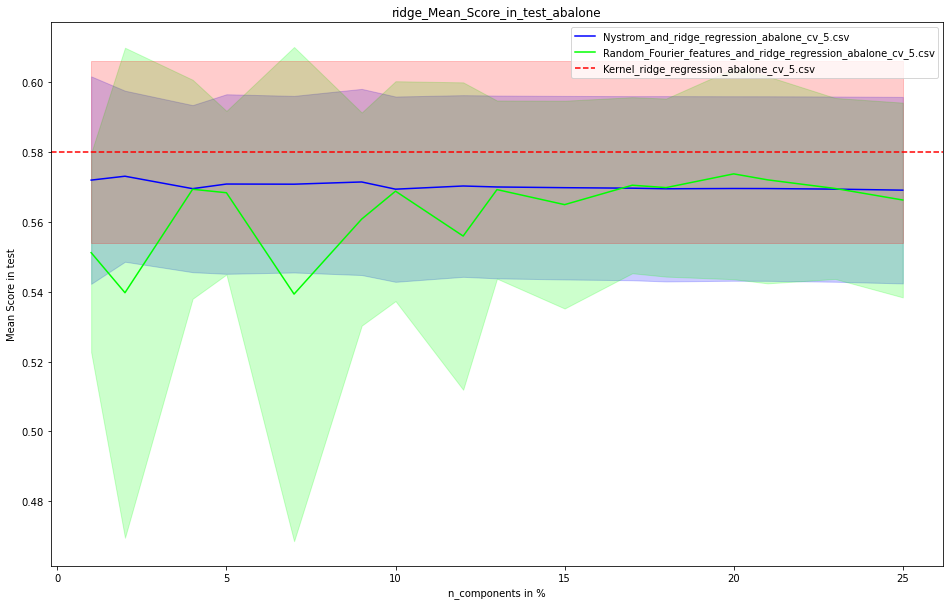

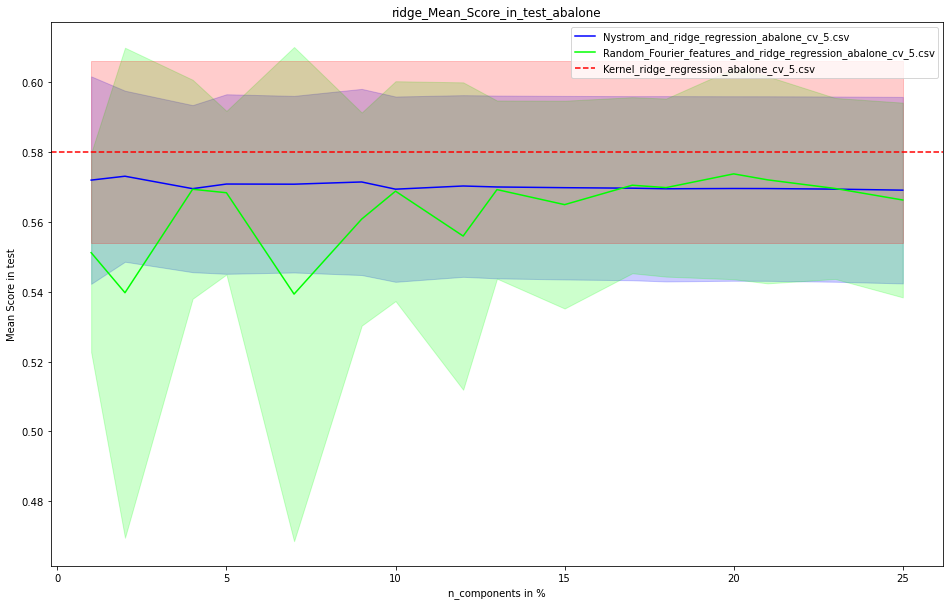

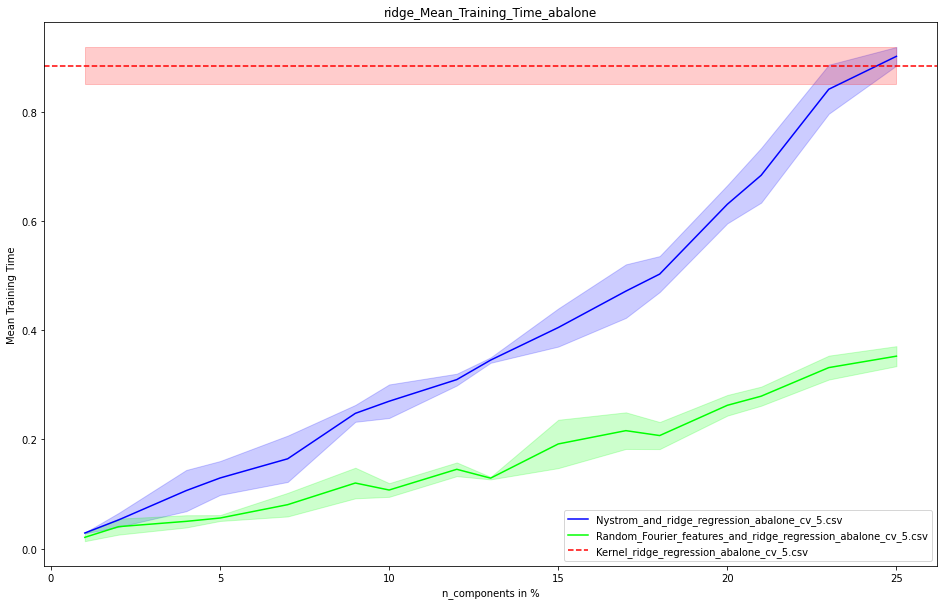

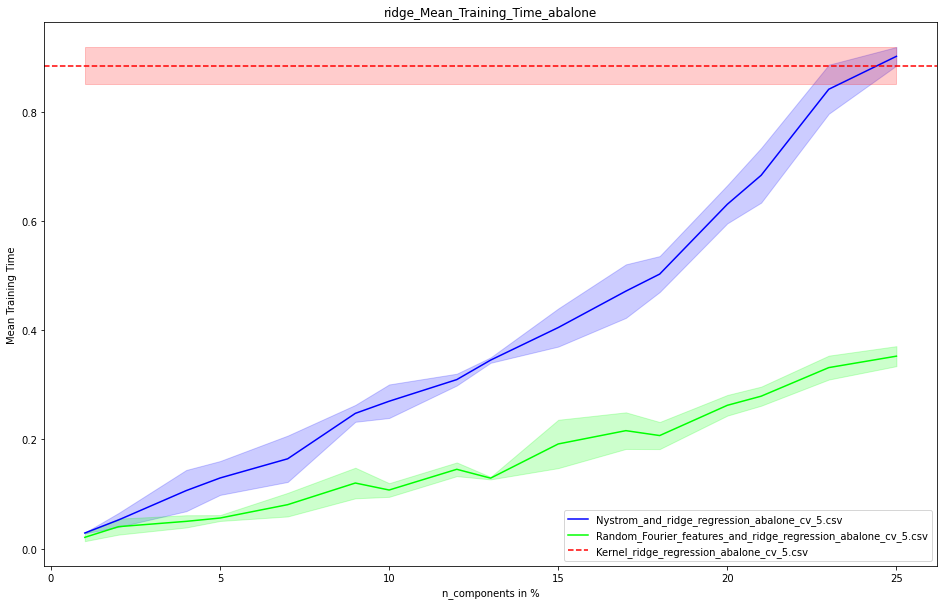

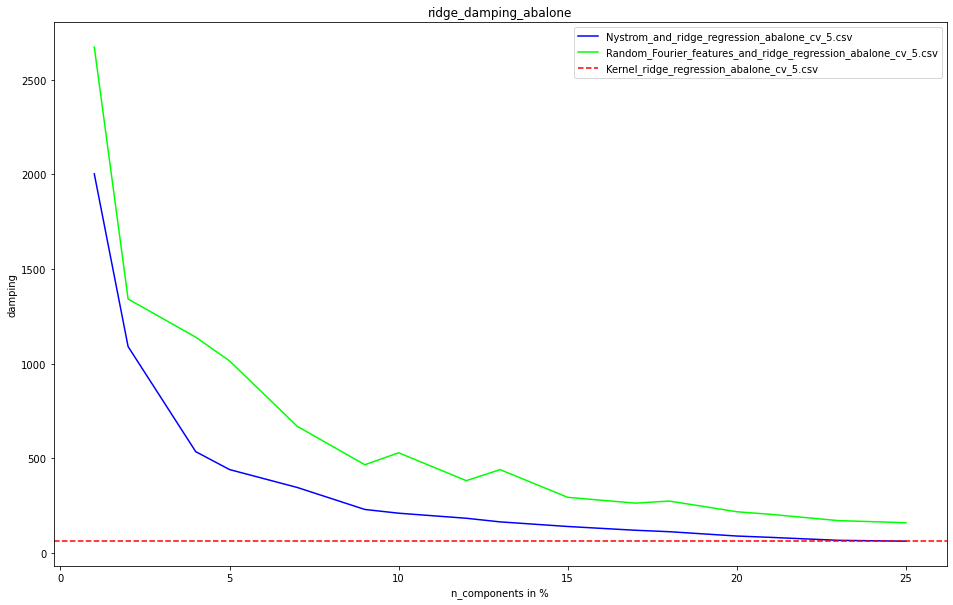

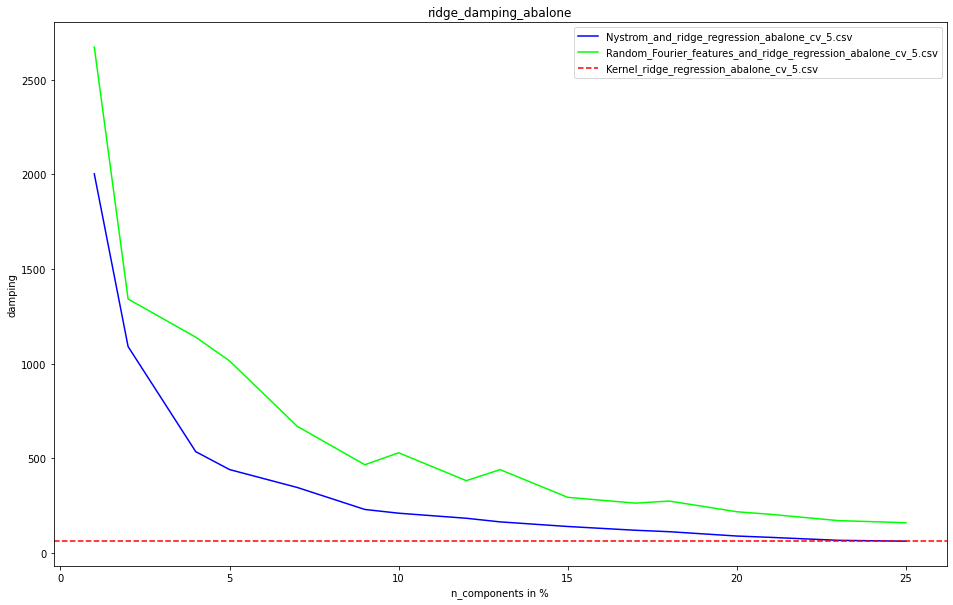

In [34]:
from plotting import view_plots_and_save_them

names_of_std_for_column = {score_column:'Std Score in test', 
    time_column:'Std Training Time',
    damping_column:False
}
if (ridge_list[0][names_of_std_for_column[score_column]] == 0).all():
    names_of_std_for_column = {score_column:'cv_std_test_score', 
        time_column:'cv_std_fit_time',
        damping_column:False
    }
columns = [score_column, time_column, damping_column ]
  

view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='ridge',
            columns=columns, database=database, plot_path = plot_path)

## SVM 

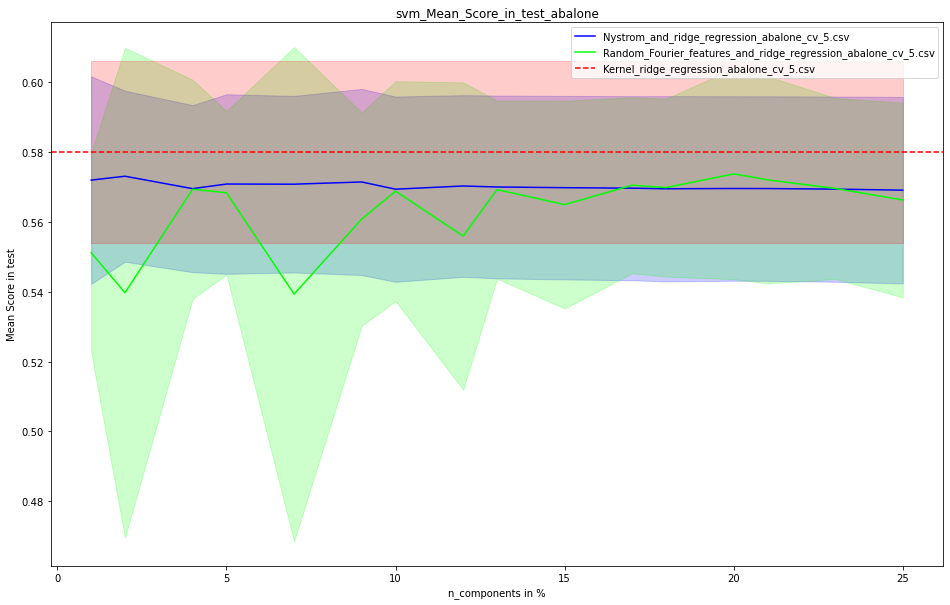

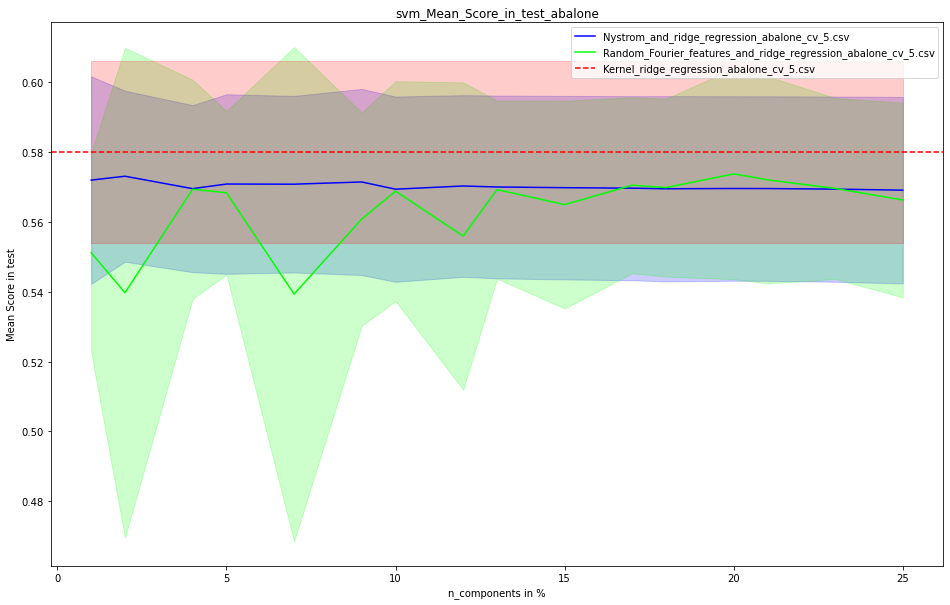

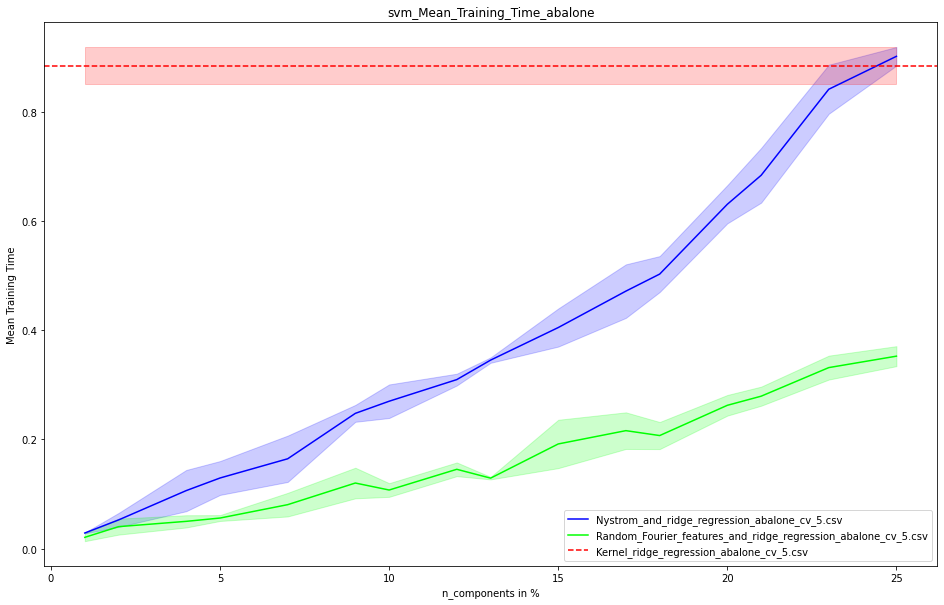

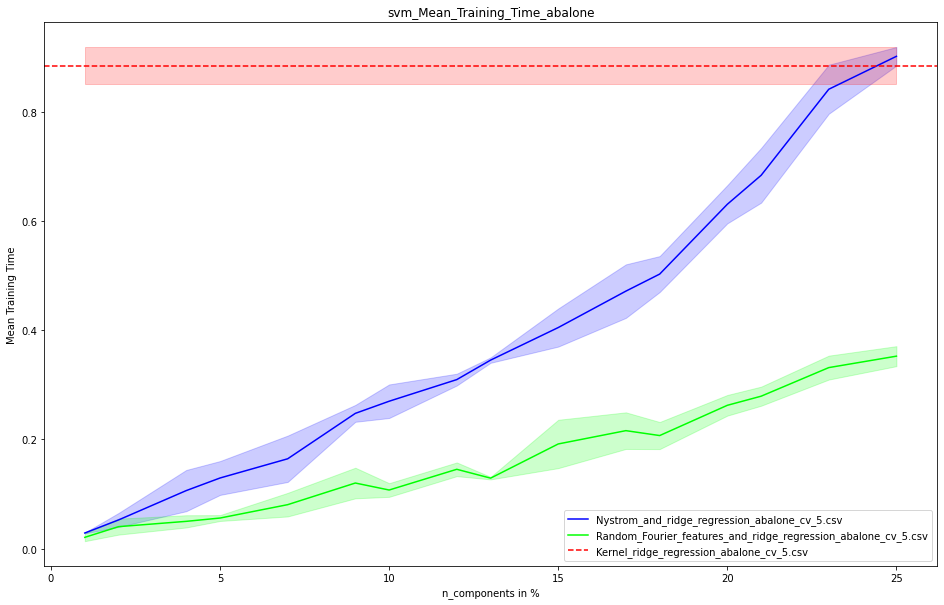

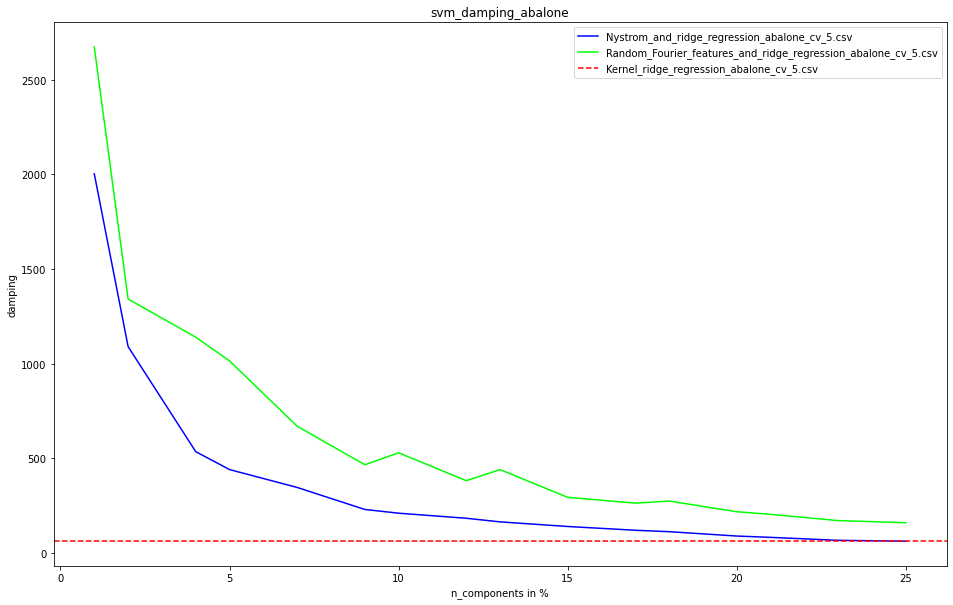

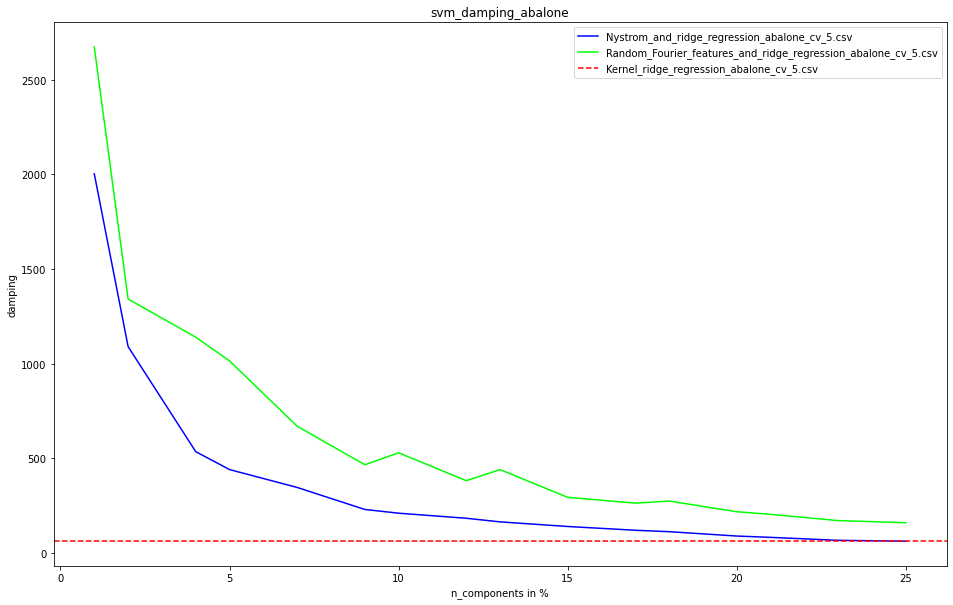

In [35]:
view_plots_and_save_them(df_list = ridge_list, df_list_names=ridge_list_names,
            names_of_std_for_column=names_of_std_for_column, type ='svm',
            columns=columns, database=database, plot_path = plot_path)

# Hyperparameter

In [36]:
print(show_verbose(svm_data_verbose, n_rows = 20))

                                                                                    Best Parameters  \
0                     {'regressor__kernel_svm__C': 100.0, 'regressor__kernel_svm__gamma': 0.015625}   
2             {'regressor__kernel_svm__C': 1.0, 'regressor__kernel_svm__gamma': 0.1767766952966369}   
3             {'regressor__kernel_svm__C': 1.0, 'regressor__kernel_svm__gamma': 0.1767766952966369}   
1      {'regressor__kernel_svm__C': 10000.0, 'regressor__kernel_svm__gamma': 0.0013810679320049757}   
64                             {'regressor__nystroem__gamma': 0.015625, 'regressor__svm__C': 100.0}   
..                                                                                              ...   
7                              {'regressor__nystroem__gamma': 0.015625, 'regressor__svm__C': 100.0}   
6                              {'regressor__nystroem__gamma': 0.015625, 'regressor__svm__C': 100.0}   
5                              {'regressor__nystroem__gamma': 0.015625, '